In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('ipl.csv')

In [3]:
data.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
#removing unwanted columns
remove_columns = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
data.drop(labels=remove_columns, axis=1, inplace=True)

In [5]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [6]:
data.shape

(76014, 9)

In [7]:
data['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [8]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab','Royal Challengers Bangalore', 
        'Delhi Daredevils','Sunrisers Hyderabad']

In [9]:
data = data[(data['bat_team'].isin(consistent_teams)) & (data['bowl_team'].isin(consistent_teams))]

In [10]:
data.tail()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
75884,19-05-2017,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,19-05-2017,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,19-05-2017,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,19-05-2017,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107
75888,19-05-2017,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107


In [11]:
data = data[data['overs']>=5.0]

In [12]:
data.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [13]:
data.shape

(40108, 9)

In [14]:
from datetime import datetime
data['date'] = data['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   bat_team        40108 non-null  object        
 2   bowl_team       40108 non-null  object        
 3   runs            40108 non-null  int64         
 4   wickets         40108 non-null  int64         
 5   overs           40108 non-null  float64       
 6   runs_last_5     40108 non-null  int64         
 7   wickets_last_5  40108 non-null  int64         
 8   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.1+ MB


**Converting categorical data using OneHotEncoding method**

In [16]:
encoded_data = pd.get_dummies(data=data, columns=['bat_team', 'bowl_team'])

In [17]:
encoded_data

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75884,2017-05-19,106,9,18.1,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75885,2017-05-19,107,9,18.2,29,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75886,2017-05-19,107,9,18.3,28,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0
75887,2017-05-19,107,9,18.4,24,4,107,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
encoded_data.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

**Rearranging the data**

In [19]:
encoded_data = encoded_data[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad','runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total']]

In [20]:
encoded_data.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,0,5.1,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.2,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.3,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.4,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,61,1,5.5,58,1,222


In [21]:
encoded_data.shape

(40108, 23)

**Splitting data into train test**

In [22]:
x_train = encoded_data.drop('total', axis=1)[encoded_data['date'].dt.year<=2016]
x_test = encoded_data.drop('total', axis=1)[encoded_data['date'].dt.year>=2017]
y_train = encoded_data[encoded_data['date'].dt.year<=2016]['total'].values
y_test = encoded_data[encoded_data['date'].dt.year>=2017]['total'].values

In [23]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(37330, 22)
(37330,)
(2778, 22)
(2778,)


In [24]:
x_train.drop(labels='date', axis=True, inplace=True)
x_test.drop(labels='date', axis=True, inplace=True)

**Linear Regression Model**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(x_train, y_train)

LinearRegression()

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [29]:
ridge = Ridge()
parameter = {'alpha':[1e-15,1e-10,1e-5,1e-2,1,2,3,5,10,25,30,50,100]}
ridge_reg = GridSearchCV(ridge, parameter, cv=5)
ridge_reg.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.01, 1, 2, 3, 5, 10,
                                   25, 30, 50, 100]})

In [30]:
ridge_reg.best_params_

{'alpha': 100}

In [31]:
ridge_reg.best_score_

0.6144668285329494

In [32]:
prediction = ridge_reg.predict(x_test)

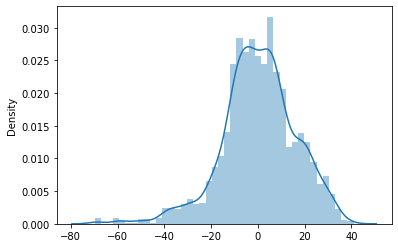

In [33]:
import seaborn as sns
sns.distplot(y_test-prediction)
plt.show()

In [34]:
from sklearn import metrics
print('MSE: ',metrics.mean_squared_error(y_test, prediction),
     '\nMAE: ', metrics.mean_absolute_error(y_test, prediction),
     '\nRMSE: ',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MSE:  251.06901128024901 
MAE:  12.115466773869315 
RMSE:  15.84515734476149


In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso()
parameters = {'alpha':[1e-5,1e-2,1e-1,1,2,3,10,15,60,100]}
lasso_reg = GridSearchCV(lasso, parameters, cv=5)
lasso_reg.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.01, 0.1, 1, 2, 3, 10, 15, 60, 100]})

In [36]:
lasso_reg.best_params_

{'alpha': 1}

In [37]:
lasso_reg.best_score_

0.6233659449313866

In [38]:
prediction = lasso_reg.predict(x_test)

<AxesSubplot:ylabel='Density'>

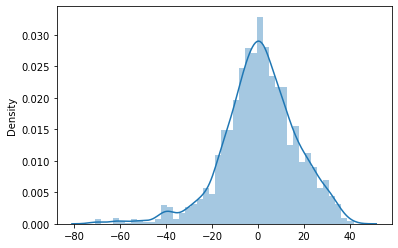

In [39]:
sns.distplot(y_test-prediction)

In [40]:
print('MSE: ',metrics.mean_squared_error(y_test, prediction),
     '\nMAE: ', metrics.mean_absolute_error(y_test, prediction),
     '\nRMSE: ',np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MSE:  262.36538279606964 
MAE:  12.213583996827492 
RMSE:  16.19769683615759


In [42]:
import pickle
filename = 'First Innings Score Prediction.pkl'
pickle.dump(lasso_reg, open(filename, 'wb'))